In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE+WL+WEATHER.csv")

data_visualize

,plant_date,DoY,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,0.2083,237.2083,53,208,87,36,44,0,21.9,97,-0.1
1,0.4583,237.4583,59,62,93,36,50,113,22.3,100,-0.1
2,0.6250,237.6250,60,61,93,36,56,152,22.8,100,-0.1
3,0.6667,237.6667,58,60,91,36,51,141,23.3,100,-0.1
4,0.7083,237.7083,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...,...,...
407,40.8750,277.8750,39,42,42,36,44,0,14.5,93,-0.1
408,41.0000,278.0000,39,42,42,36,44,0,13.9,99,-0.1
409,41.0833,278.0833,39,42,42,36,44,0,14.4,100,-0.1
410,41.2083,278.2083,39,42,42,36,44,0,14.6,98,-0.1


In [17]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 50000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [18]:
data = np.loadtxt("DATE+WL+WEATHER_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, shuffle = False)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [20]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[-0.36993513]
 [ 0.17204654]
 [-0.0482759 ]
 [ 0.05106526]
 [-0.06462203]
 [-0.28407568]
 [-0.1774314 ]
 [ 0.00210535]
 [-0.46938485]
 [-0.07607237]] 
 bias: 0.04813165 
 loss: 1.1139699 

step: 20000 
 w: 
 [[-4.8303604e-03]
 [-2.0173828e-03]
 [ 6.3895743e-05]
 [ 9.3613740e-04]
 [-2.2840039e-03]
 [ 2.2724001e-02]
 [ 7.9270313e-03]
 [ 1.0161460e-05]
 [-1.4036532e-02]
 [-1.9125646e-03]] 
 bias: -0.16300565 
 loss: 0.0066852323 

step: 30000 
 w: 
 [[ 3.9925170e-03]
 [-8.7086894e-03]
 [ 2.4806929e-04]
 [ 8.9122512e-04]
 [-1.7558148e-03]
 [ 4.3038346e-02]
 [ 2.1089992e-02]
 [-6.8146264e-06]
 [-9.1167344e-03]
 [-6.3996366e-04]] 
 bias: -0.17074488 
 loss: 0.0059101884 

step: 40000 
 w: 
 [[ 3.9929957e-03]
 [-8.7086717e-03]
 [ 2.4829054e-04]
 [ 8.9144002e-04]
 [-1.7555826e-03]
 [ 4.3039158e-02]
 [ 2.1090593e-02]
 [-6.5989684e-06]
 [-9.1163740e-03]
 [-6.3970988e-04]] 
 bias: -0.17074448 
 loss: 0.0059101563 

step: 50000 
 w: 
 [[ 3.9929994e-03]
 [-8.7086773e-03]
 [ 2.48

In [21]:
y_hat = tf.matmul(x_test, w) + bias

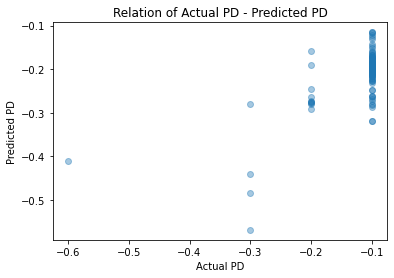

In [22]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.10915652
MAE: 0.099239364
